# Prediction of Traffic Accident Risk
Team 7: 어서오십쇼HUMAN  
Editor: 허윤행, 김용현
## 1. Preprocess

In [1]:
# 사전 준비
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

plt.style.use('seaborn')
sns.set(font_scale=2.5)

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   


In [3]:
sample = pd.read_csv('../input/TAAS_data.csv')

print("sample.shape:", sample.shape)

# 초기 샘플 데이터
sample

sample.shape: (283011, 13)


,사고내용,사고 시 특이사항,기상상태,차량년식,가해자성별,가해자나이,요일,가해차종,노면상태,보행자이동,빛 세기,사고 위치,사고 시 통제 방법
0,경상,특이사항 없음,맑음,11.0,남성,45.0,월,자가용,건조,불명,밝음,위험로,일방 통행
1,경상,특이사항 없음,맑음,1.0,여성,25.0,토,자가용,건조,불명,밝음,위험로,신호등
2,경상,특이사항 없음,맑음,불명,남성,51.0,토,자가용,건조,보행자가 아님,밝음,위험로,신호등
3,경상,특이사항 없음,맑음,1.0,남성,50.0,수,7.5t급 미만,건조,운전자 주변 사고,밝음,20m내에 교차로 없음,불명
4,경상,특이사항 없음,맑음,불명,남성,27.0,금,자가용,건조,불명,밝음,교차로 접근로,일방 통행
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285326,경상,특이사항 없음,눈,1.0,남성,57.0,목,자가용,얼음,불명,조명 없음,20m내에 교차로 없음,불명
285327,경상,특이사항 없음,눈,불명,남성,19.0,목,자가용,얼음,보행자가 아님,조명 없음,20m내에 교차로 없음,불명
285328,경상,특이사항 없음,눈,5.0,남성,불명,목,자가용,얼음,불명,조명 없음,20m내에 교차로 없음,불명
285329,경상,특이사항 없음,눈,15.0,남성,29.0,목,자가용,얼음,보행자가 아님,조명 없음,20m내에 교차로 없음,불명


# 2. 결측값 제거 

In [4]:
# 제거해주세용 - 바로 진행합니다~
sample.replace('불명',np.nan,inplace = True)
sample

,사고내용,사고 시 특이사항,기상상태,차량년식,가해자성별,가해자나이,요일,가해차종,노면상태,보행자이동,빛 세기,사고 위치,사고 시 통제 방법
0,경상,특이사항 없음,맑음,11.0,남성,45.0,월,자가용,건조,NaN,밝음,위험로,일방 통행
1,경상,특이사항 없음,맑음,1.0,여성,25.0,토,자가용,건조,NaN,밝음,위험로,신호등
2,경상,특이사항 없음,맑음,NaN,남성,51.0,토,자가용,건조,보행자가 아님,밝음,위험로,신호등
3,경상,특이사항 없음,맑음,1.0,남성,50.0,수,7.5t급 미만,건조,운전자 주변 사고,밝음,20m내에 교차로 없음,NaN
4,경상,특이사항 없음,맑음,NaN,남성,27.0,금,자가용,건조,NaN,밝음,교차로 접근로,일방 통행
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285326,경상,특이사항 없음,눈,1.0,남성,57.0,목,자가용,얼음,NaN,조명 없음,20m내에 교차로 없음,NaN
285327,경상,특이사항 없음,눈,NaN,남성,19.0,목,자가용,얼음,보행자가 아님,조명 없음,20m내에 교차로 없음,NaN
285328,경상,특이사항 없음,눈,5.0,남성,NaN,목,자가용,얼음,NaN,조명 없음,20m내에 교차로 없음,NaN
285329,경상,특이사항 없음,눈,15.0,남성,29.0,목,자가용,얼음,보행자가 아님,조명 없음,20m내에 교차로 없음,NaN


In [5]:
sample.isnull().sum()

사고내용               0
사고 시 특이사항        208
기상상태            4642
차량년식           86346
가해자성별          16320
가해자나이          29766
요일                 0
가해차종              58
노면상태             530
보행자이동         102814
빛 세기            3661
사고 위치             67
사고 시 통제 방법    111765
dtype: int64

In [6]:
sample = sample.dropna()
sample

,사고내용,사고 시 특이사항,기상상태,차량년식,가해자성별,가해자나이,요일,가해차종,노면상태,보행자이동,빛 세기,사고 위치,사고 시 통제 방법
8,경상,특이사항 없음,맑음,1.0,남성,24.0,목,자가용,건조,표지판 무시 운전자 주변 사고,밝음,교차로 접근로,신호등
14,경상,특이사항 없음,맑음,1.0,여성,23.0,수,자가용,건조,보행자가 아님,밝음,위험로,일방 통행
25,경상,특이사항 없음,맑음,8.0,여성,48.0,토,자가용,건조,보행자가 아님,밝음,위험로,일방 통행
26,경상,특이사항 없음,맑음,7.0,여성,47.0,목,자가용,건조,운전자 정면에서 보행 중 사고,밝음,위험로,일방 통행
28,경상,특이사항 없음,맑음,7.0,남성,41.0,수,자가용,건조,보행자가 아님,밝음,위험로,일방 통행
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285297,경상,특이사항 없음,맑음,12.0,여성,50.0,화,자가용,젖음,운전자 주변 사고,조명 있음,교차로 접근로,일방 통행
285307,경상,특이사항 없음,맑음,11.0,여성,24.0,수,자가용,젖음,보행자가 아님,밝음,위험로,일방 통행
285312,경상,특이사항 없음,비,7.0,여성,75.0,토,자가용,젖음,보행자가 아님,밝음,교차로 접근로,일방 통행
285313,경상,특이사항 없음,비,4.0,남성,20.0,토,자가용,젖음,보행자가 아님,밝음,경사로 진입로,일방 통행


In [7]:
#기타/불명 -> 불명으로 변경 후 삭제 데이터 7만 얼마에서 69000대로 줄어든 거 확인!!!!

# 3. label 변경

In [11]:
## 범주형 데이터 -> 수치형 데이터
# 사고내용
Target = {1: "사망", 2 : "중상", 3 : "경상"}

for label in Target:
    sample['사고내용'] = np.where(sample['사고내용'] == Target[label], label, sample['사고내용'])


# 사고 시 특이사항
Detail = {0: "특이사항 없음", 1: "신호등 꺼짐상태", 2: "신호등 이상", 3: "보행자 신호", 4: "인도 위 사고", 5: "노면상태 결함", 6: "미끄러움", 7: "질퍽한 도로"}

for label in Detail:
    sample['사고 시 특이사항'] = np.where(sample['사고 시 특이사항'] == Detail[label], label, sample['사고 시 특이사항'])

# 기상 상태
Weather = {1 : "맑음", 2 : "비", 3: "눈", 4: "바람", 5: "폭풍우", 6: "눈보라", 7: "안개", 8: "기타", 9: "불명"}

for label in Weather:
    sample['기상상태'] = np.where(sample['기상상태'] == Weather[label], label, sample['기상상태'])

# 가해자성별
Sex = {1: "남성", 2: "여성"}

for label in Sex:
    sample['가해자성별'] = np.where(sample['가해자성별'] == Sex[label], label, sample['가해자성별'])

# 가해차종
CarType = {1: '자전거',2: '50cc', 3: '125cc', 4:'500cc', 5: '500cc 이상',8: '택시',9: '자가용',10: '승합차',11: '버스', 16: '기타', 17: '농기계', 18: '트럭', 19: '3.5t급 미만', 20: '7.5t급 미만', 21: '7.5t급 이상', 22: '스쿠터',23: '전기차'}

for label in CarType:
    sample['가해차종'] = np.where(sample['가해차종'] == CarType[label], label, sample['가해차종'])
    
# 노면상태
RoadState = {1: '건조',2: '젖음',3: '눈',4: '얼음',5: '3cm이상 물에 잠김',6: '미끄러움',7: '질퍽한 도로'}

for label in RoadState:
    sample['노면상태'] = np.where(sample['노면상태'] == RoadState[label], label, sample['노면상태'])

# 빛 세기
Light = {1:'밝음',4: '조명 있음', 5: '어두움',6: '조명 없음',7: '기타/불명'}

for label in Light:
    sample['빛 세기'] = np.where(sample['빛 세기'] == Light[label], label, sample['빛 세기'])

# 사고 시 통제 방법

Control = {0: '20m내에 교차로 없음', 1: '교통 정리 경찰',2: '신호등',3: '정지 신호',4: '일방 통행'}

for label in Control:
    sample['사고 시 통제 방법'] = np.where(sample['사고 시 통제 방법'] == Control[label], label, sample['사고 시 통제 방법'])

# 사고 위치
JunLocation = { 0 : '20m내에 교차로 없음',1 : '교차로 접근로',2 : '비어있는 교차로',3 : '회전교차로 출구',4 : '회전 교차로 입구',5 : '주 도로 출구',6 : '주 도로 입구',7 : '경사로 진입로',8 : '위험로'}

for label in JunLocation:
    sample['사고 위치'] = np.where(sample['사고 위치'] == JunLocation[label],label,sample['사고 위치'])
    

arr_day = {1: '일',2 : '월',3 : '화',4 : '수',5 : '목',6 : '금',7: '토'}

for label in arr_day:
    sample['요일'] = np.where(sample['요일'] == arr_day[label],label,sample['요일'])

arr_ped = {0: '보행자가 아님',1 : '운전자 주변 사고',2 : '표지판 무시 운전자 주변 사고',3 :'운전자 정면에서 보행 중 사고',4: '표지판 무시 운전자 정면 사고',5 : '교차로에서 사고',6: '교차로에서 표지판 무시 운전자 사고',7 : '교차로에서 보행 중 사고',8 :'교차로에서 역 방향 보행 중 사고'}

for label in arr_ped:
    sample['보행자이동'] = np.where(sample['보행자이동'] == arr_ped[label],label,sample['보행자이동'])
        

sample    

,사고내용,사고 시 특이사항,기상상태,차량년식,가해자성별,가해자나이,요일,가해차종,노면상태,보행자이동,빛 세기,사고 위치,사고 시 통제 방법
8,3,0,1,1.0,1,24.0,5,9,1,2,1,1,2
14,3,0,1,1.0,2,23.0,4,9,1,0,1,8,4
25,3,0,1,8.0,2,48.0,7,9,1,0,1,8,4
26,3,0,1,7.0,2,47.0,5,9,1,3,1,8,4
28,3,0,1,7.0,1,41.0,4,9,1,0,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285297,3,0,1,12.0,2,50.0,3,9,2,1,4,1,4
285307,3,0,1,11.0,2,24.0,4,9,2,0,1,8,4
285312,3,0,2,7.0,2,75.0,7,9,2,0,1,1,4
285313,3,0,2,4.0,1,20.0,7,9,2,0,1,7,4


In [12]:
## 범주형 데이터 -> 원핫 인코딩
# To Do List:
# 요일, 보행자이동
sample

,사고내용,사고 시 특이사항,기상상태,차량년식,가해자성별,가해자나이,요일,가해차종,노면상태,보행자이동,빛 세기,사고 위치,사고 시 통제 방법
8,3,0,1,1.0,1,24.0,5,9,1,2,1,1,2
14,3,0,1,1.0,2,23.0,4,9,1,0,1,8,4
25,3,0,1,8.0,2,48.0,7,9,1,0,1,8,4
26,3,0,1,7.0,2,47.0,5,9,1,3,1,8,4
28,3,0,1,7.0,1,41.0,4,9,1,0,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285297,3,0,1,12.0,2,50.0,3,9,2,1,4,1,4
285307,3,0,1,11.0,2,24.0,4,9,2,0,1,8,4
285312,3,0,2,7.0,2,75.0,7,9,2,0,1,1,4
285313,3,0,2,4.0,1,20.0,7,9,2,0,1,7,4


In [10]:
#이 쉘은 원핫 인코딩을 위한 쉘입니다.

#sample = pd.get_dummies(sample,columns=['요일'],prefix=['요일'])
#sample = pd.get_dummies(sample,columns=['보행자이동'],prefix=['보행자이동'])
#sample

,사고내용,사고 시 특이사항,기상상태,차량년식,가해자성별,가해자나이,가해차종,노면상태,빛 세기,사고 위치,...,요일_화,보행자이동_교차로에서 보행 중 사고,보행자이동_교차로에서 사고,보행자이동_교차로에서 역 방향 보행 중 사고,보행자이동_교차로에서 표지판 무시 운전자 사고,보행자이동_보행자가 아님,보행자이동_운전자 정면에서 보행 중 사고,보행자이동_운전자 주변 사고,보행자이동_표지판 무시 운전자 정면 사고,보행자이동_표지판 무시 운전자 주변 사고
8,3,0,1,1.0,1,24.0,9,1,1,1,...,0,0,0,0,0,0,0,0,0,1
14,3,0,1,1.0,2,23.0,9,1,1,8,...,0,0,0,0,0,1,0,0,0,0
25,3,0,1,8.0,2,48.0,9,1,1,8,...,0,0,0,0,0,1,0,0,0,0
26,3,0,1,7.0,2,47.0,9,1,1,8,...,0,0,0,0,0,0,1,0,0,0
28,3,0,1,7.0,1,41.0,9,1,1,8,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285297,3,0,1,12.0,2,50.0,9,2,4,1,...,1,0,0,0,0,0,0,1,0,0
285307,3,0,1,11.0,2,24.0,9,2,1,8,...,0,0,0,0,0,1,0,0,0,0
285312,3,0,2,7.0,2,75.0,9,2,1,1,...,0,0,0,0,0,1,0,0,0,0
285313,3,0,2,4.0,1,20.0,9,2,1,7,...,0,0,0,0,0,1,0,0,0,0


In [13]:
sample.dtypes

사고내용          object
사고 시 특이사항     object
기상상태          object
차량년식          object
가해자성별         object
가해자나이         object
요일            object
가해차종          object
노면상태          object
보행자이동         object
빛 세기          object
사고 위치         object
사고 시 통제 방법    object
dtype: object

In [15]:
#object 형태에서 int형으로 통일하기 위한 작업
#우선 float형태가 있기 때문에 float로 갔다가 int로 변경
sample = sample.astype('float')
sample = sample.astype('int')
sample.dtypes

사고내용          int32
사고 시 특이사항     int32
기상상태          int32
차량년식          int32
가해자성별         int32
가해자나이         int32
요일            int32
가해차종          int32
노면상태          int32
보행자이동         int32
빛 세기          int32
사고 위치         int32
사고 시 통제 방법    int32
dtype: object

In [16]:
sample

,사고내용,사고 시 특이사항,기상상태,차량년식,가해자성별,가해자나이,요일,가해차종,노면상태,보행자이동,빛 세기,사고 위치,사고 시 통제 방법
8,3,0,1,1,1,24,5,9,1,2,1,1,2
14,3,0,1,1,2,23,4,9,1,0,1,8,4
25,3,0,1,8,2,48,7,9,1,0,1,8,4
26,3,0,1,7,2,47,5,9,1,3,1,8,4
28,3,0,1,7,1,41,4,9,1,0,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285297,3,0,1,12,2,50,3,9,2,1,4,1,4
285307,3,0,1,11,2,24,4,9,2,0,1,8,4
285312,3,0,2,7,2,75,7,9,2,0,1,1,4
285313,3,0,2,4,1,20,7,9,2,0,1,7,4


# 3. logarithm 함수 써서 정규화(나이)

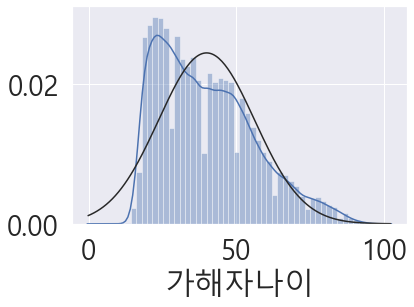

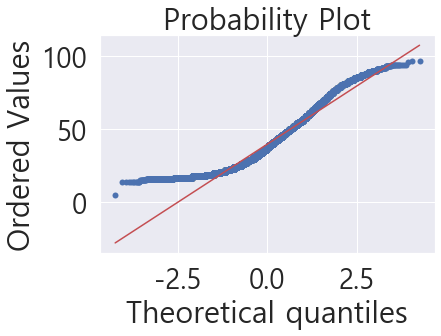

In [17]:
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(sample['가해자나이'], fit=norm);
fig = plt.figure()
res = stats.probplot(sample['가해자나이'], plot=plt)
plt.show()

In [18]:
# log 함수로 수치 변경
sample['가해자나이'] = np.log1p(sample['가해자나이']) 

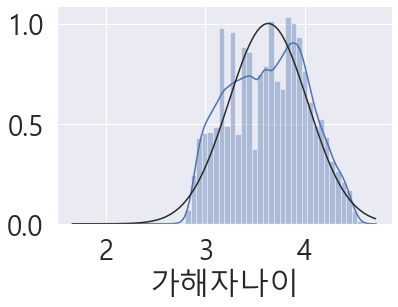

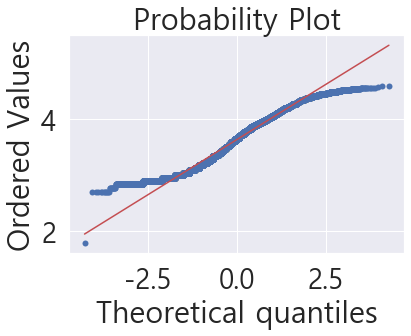

In [19]:
sns.distplot(sample['가해자나이'], fit=norm);
fig = plt.figure()
res = stats.probplot(sample['가해자나이'], plot=plt)
plt.show()

In [20]:
sample

,사고내용,사고 시 특이사항,기상상태,차량년식,가해자성별,가해자나이,요일,가해차종,노면상태,보행자이동,빛 세기,사고 위치,사고 시 통제 방법
8,3,0,1,1,1,3.218876,5,9,1,2,1,1,2
14,3,0,1,1,2,3.178054,4,9,1,0,1,8,4
25,3,0,1,8,2,3.891820,7,9,1,0,1,8,4
26,3,0,1,7,2,3.871201,5,9,1,3,1,8,4
28,3,0,1,7,1,3.737670,4,9,1,0,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285297,3,0,1,12,2,3.931826,3,9,2,1,4,1,4
285307,3,0,1,11,2,3.218876,4,9,2,0,1,8,4
285312,3,0,2,7,2,4.330733,7,9,2,0,1,1,4
285313,3,0,2,4,1,3.044522,7,9,2,0,1,7,4


In [21]:
from imblearn.combine import *
from imblearn.over_sampling import *

sample = sample.iloc[np.random.permutation(len(sample))]

y = sample.loc[:, sample.columns == '사고내용']
x = sample.loc[:, sample.columns != '사고내용']

x_samp , y_samp = ADASYN(random_state = 20000).fit_sample(x,y)
#x_samp2, y_samp2 = SMOTETomek(random_state = 4).fit_sample(x,y)
resample = pd.concat([y_samp,x_samp],axis = 1)

resample

,사고내용,사고 시 특이사항,기상상태,차량년식,가해자성별,가해자나이,요일,가해차종,노면상태,보행자이동,빛 세기,사고 위치,사고 시 통제 방법
0,2,0,2,7,2,3.258097,7,9,2,1,1,2,4
1,3,0,2,9,1,4.330733,2,9,2,0,1,1,1
2,2,0,1,1,1,3.828641,6,4,1,0,1,2,4
3,3,0,1,12,2,3.295837,3,9,1,0,4,6,2
4,3,0,1,4,2,3.850148,1,9,1,0,1,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180435,2,0,1,7,1,4.259338,2,9,1,0,1,8,3
180436,2,0,1,7,1,4.234422,2,9,1,0,1,8,3
180437,2,0,1,7,1,4.245299,2,9,1,0,1,8,3
180438,2,0,1,7,1,4.240228,2,9,1,0,1,8,3


In [22]:
resample = pd.get_dummies(resample,columns=['요일'],prefix=['요일'])
resample = pd.get_dummies(resample,columns=['보행자이동'],prefix=['보행자이동'])
resample

,사고내용,사고 시 특이사항,기상상태,차량년식,가해자성별,가해자나이,가해차종,노면상태,빛 세기,사고 위치,...,요일_7,보행자이동_0,보행자이동_1,보행자이동_2,보행자이동_3,보행자이동_4,보행자이동_5,보행자이동_6,보행자이동_7,보행자이동_8
0,2,0,2,7,2,3.258097,9,2,1,2,...,1,0,1,0,0,0,0,0,0,0
1,3,0,2,9,1,4.330733,9,2,1,1,...,0,1,0,0,0,0,0,0,0,0
2,2,0,1,1,1,3.828641,4,1,1,2,...,0,1,0,0,0,0,0,0,0,0
3,3,0,1,12,2,3.295837,9,1,4,6,...,0,1,0,0,0,0,0,0,0,0
4,3,0,1,4,2,3.850148,9,1,1,8,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180435,2,0,1,7,1,4.259338,9,1,1,8,...,0,1,0,0,0,0,0,0,0,0
180436,2,0,1,7,1,4.234422,9,1,1,8,...,0,1,0,0,0,0,0,0,0,0
180437,2,0,1,7,1,4.245299,9,1,1,8,...,0,1,0,0,0,0,0,0,0,0
180438,2,0,1,7,1,4.240228,9,1,1,8,...,0,1,0,0,0,0,0,0,0,0


In [24]:
pd.crosstab(resample['가해차종'], resample['보행자이동_1'], margins=True)

보행자이동_1,0,1,All
가해차종,,,
2,2933,19,2952
3,13893,130,14023
4,6347,91,6438
5,17191,64,17255
6,200,13,213
7,222,5,227
8,4819,596,5415
9,110889,6794,117683
10,1671,210,1881


In [25]:
from sklearn.preprocessing import MinMaxScaler

resample = resample.iloc[np.random.permutation(len(resample))]

y = resample.loc[:, resample.columns == '사고내용']
x = resample.loc[:, resample.columns != '사고내용']

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(x)
x = minMaxScaler.transform(x)
x

array([[0.        , 0.        , 0.05555556, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08888889, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.13333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.14285714, 0.03333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.1       , ..., 0.        , 0.        ,
        0.        ]])

In [27]:
newsample = pd.DataFrame(data = x,columns = resample.columns[1:])
newsample

,사고 시 특이사항,기상상태,차량년식,가해자성별,가해자나이,가해차종,노면상태,빛 세기,사고 위치,사고 시 통제 방법,...,요일_7,보행자이동_0,보행자이동_1,보행자이동_2,보행자이동_3,보행자이동_4,보행자이동_5,보행자이동_6,보행자이동_7,보행자이동_8
0,0.0,0.000000,0.055556,1.0,0.610319,0.35,0.00,0.0,0.125,1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.088889,0.0,0.772471,0.35,0.00,0.0,0.125,1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.166667,0.0,0.850043,0.40,0.00,0.0,0.250,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.111111,0.0,0.574890,0.35,0.00,0.0,0.250,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.066667,0.0,0.747856,0.30,0.00,0.0,1.000,0.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180435,0.0,0.000000,0.011111,0.0,0.866269,0.35,0.00,0.0,0.875,1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180436,0.0,0.428571,0.077778,1.0,0.713312,0.35,0.25,0.6,0.125,0.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180437,0.0,0.000000,0.133333,0.0,0.641470,0.35,0.00,0.0,0.125,0.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180438,0.0,0.142857,0.033333,0.0,0.663597,0.35,0.25,0.0,0.125,1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(newsample, y, test_size=0.2,random_state = 1)
model = RandomForestClassifier()

model.fit(x_train,y_train)

pred_m1 = model.predict(x_test)

val_m1 = (pred_m1 == y_test["사고내용"]).mean()

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,pred_m1,target_names=['class 1','class 2','class 3']))
cm = confusion_matrix(y_test,pred_m1)
print('Confusion matrix: \n',cm)

              precision    recall  f1-score   support

     class 1       0.95      0.96      0.96     12001
     class 2       0.82      0.84      0.83     12127
     class 3       0.84      0.82      0.83     11960

    accuracy                           0.87     36088
   macro avg       0.87      0.87      0.87     36088
weighted avg       0.87      0.87      0.87     36088

Confusion matrix: 
 [[11495   270   236]
 [  300 10172  1655]
 [  251  1906  9803]]


In [32]:
result = pd.concat([y,newsample],axis = 1)
result.to_csv('../input/finalres.csv', encoding='utf-8-sig',index_label=False)
result

,사고내용,사고 시 특이사항,기상상태,차량년식,가해자성별,가해자나이,가해차종,노면상태,빛 세기,사고 위치,...,요일_7,보행자이동_0,보행자이동_1,보행자이동_2,보행자이동_3,보행자이동_4,보행자이동_5,보행자이동_6,보행자이동_7,보행자이동_8
0,2,0.0,0.000000,0.055556,1.0,0.610319,0.35,0.00,0.0,0.125,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0.0,0.000000,0.088889,0.0,0.772471,0.35,0.00,0.0,0.125,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.000000,0.166667,0.0,0.850043,0.40,0.00,0.0,0.250,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.000000,0.111111,0.0,0.574890,0.35,0.00,0.0,0.250,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,0.0,0.000000,0.066667,0.0,0.747856,0.30,0.00,0.0,1.000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180435,2,0.0,0.000000,0.011111,0.0,0.866269,0.35,0.00,0.0,0.875,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180436,2,0.0,0.428571,0.077778,1.0,0.713312,0.35,0.25,0.6,0.125,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180437,2,0.0,0.000000,0.133333,0.0,0.641470,0.35,0.00,0.0,0.125,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180438,2,0.0,0.142857,0.033333,0.0,0.663597,0.35,0.25,0.0,0.125,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 4. 상관관계 분석 및 시각화

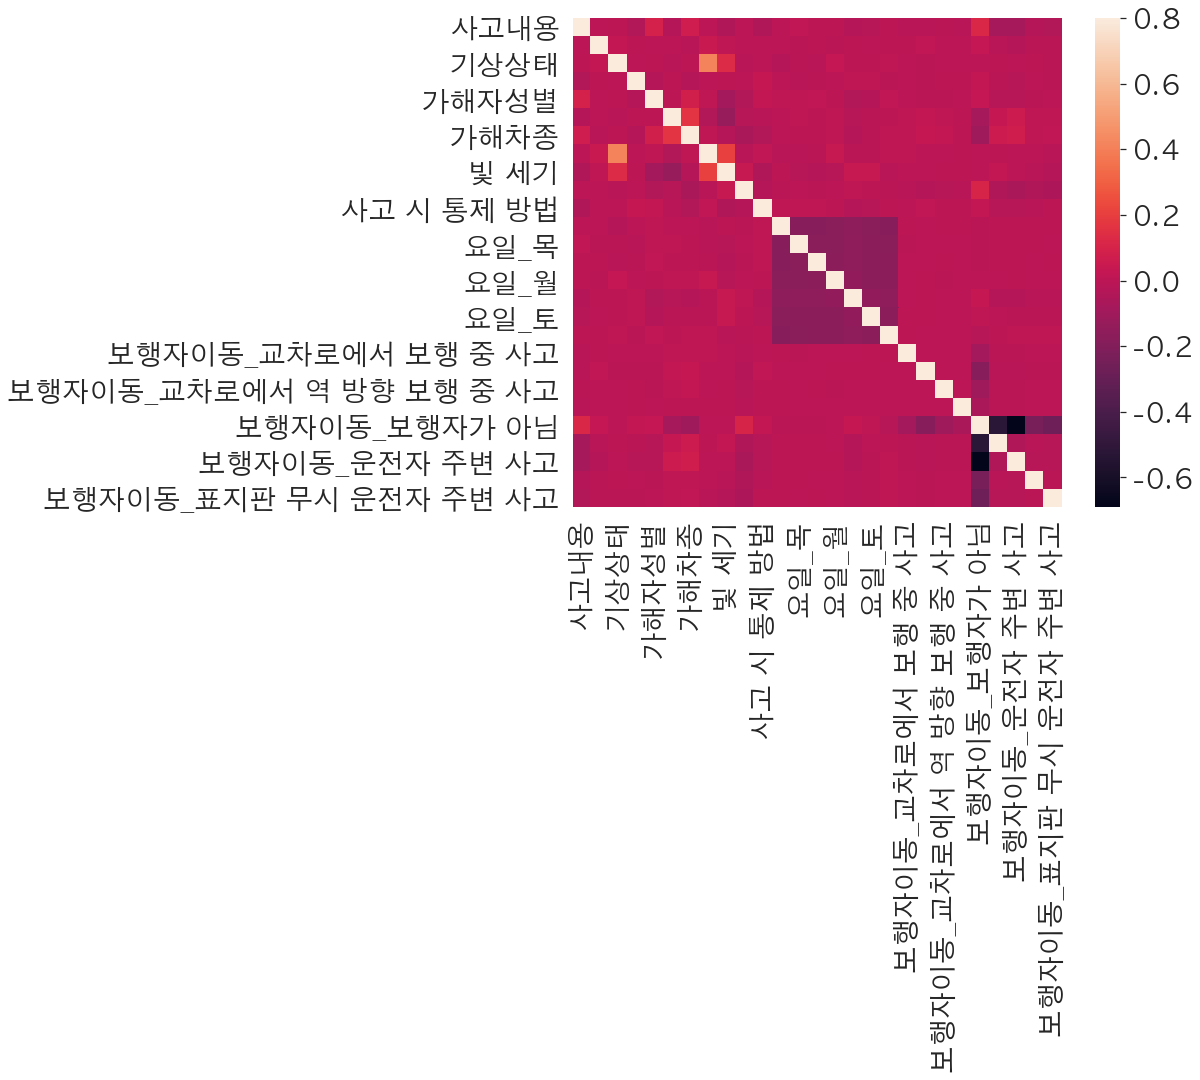

In [17]:
corrmat = sample.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

#ax = sns.pairplot(df, size)
plt.show()

Index(['사고내용', '보행자이동_보행자가 아님', '가해자성별', '가해차종', '요일_목', '요일_월'], dtype='object')


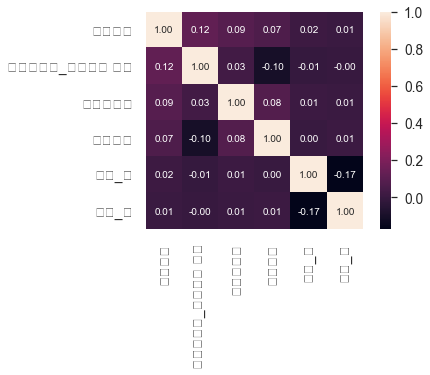

In [18]:
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, '사고내용')['사고내용'].index
print(cols)
cm = np.corrcoef(sample[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# 5. 데이터 저장

In [19]:
sample.to_csv('../input/final.csv', encoding='utf-8-sig',index_label=False)